In [28]:
import pandas as pd

df_train = pd.read_csv("GUIDE_train_cleaned.csv")

df_train.to_parquet("GUIDE_train_cleaned.parquet", index=False)

In [29]:

df = pd.read_parquet('GUIDE_train_cleaned.parquet')
total_size = df.shape[0]
print(total_size)

9093033


In [30]:
x = df['IncidentGrade'].value_counts().to_dict()
value_to_find = min(list(x.values()))
key = next((k for k, v in x.items() if v == value_to_find), None)

In [31]:
# Determine the minimum count
counts = df['IncidentGrade'].value_counts()
min_count = counts.min()

# Create a new DataFrame to hold the balanced data
balanced_df = pd.DataFrame()

# For each category, sample min_count rows randomly
for category in counts.index:
    category_df = df[df['IncidentGrade'] == category]
    if len(category_df) > min_count:
        category_df = category_df.sample(min_count, random_state=1)  # Adjust random_state as needed
    balanced_df = pd.concat([balanced_df, category_df])

# Reset index if needed
balanced_df = balanced_df.reset_index(drop=True)

# Check the balanced counts
print(balanced_df['IncidentGrade'].value_counts())

IncidentGrade
BenignPositive    1957726
TruePositive      1957726
FalsePositive     1957726
Name: count, dtype: int64


In [32]:
balanced_df.reset_index(drop = True)
balanced_df.to_parquet("GUIDE_train_cleaned_balanced.parquet", index=False)

del balanced_df

In [33]:
balanced_df = pd.read_parquet('GUIDE_train_cleaned_balanced.parquet')
total_size = balanced_df.shape[0]
del balanced_df

In [34]:
import pyarrow.parquet as pq
import pandas as pd

# Specify the path to your large Parquet file
file_path = 'GUIDE_train_cleaned_balanced.parquet'

# Define the chunk size
chunk_size = 500000
output_files_list = []

# Open the Parquet file
parquet_file = pq.ParquetFile(file_path)

# Initialize variables
chunk_number = 0
rows_read = 0
df_list = []

# Read the entire Parquet file in chunks
for batch in parquet_file.iter_batches(batch_size=chunk_size):
    # Convert the batch to a DataFrame
    df = batch.to_pandas()
    
    # Append the DataFrame to the list
    df_list.append(df)
    rows_read += len(df)
    
    # If the number of rows read reaches or exceeds the chunk size
    if rows_read >= chunk_size:
        # Concatenate DataFrames in the list
        chunk_df = pd.concat(df_list)
        
        # Save the chunk to a separate Parquet file
        output_file = f'GUIDE_train_cleaned_{chunk_number}.parquet'
        chunk_df.to_parquet(output_file)
        print(f"Saved chunk {chunk_number}: {output_file}")
        output_files_list.append(output_file)
        
        # Reset for the next chunk
        chunk_number += 1
        rows_read = 0
        df_list = []

# Save any remaining rows as the last chunk
if df_list:
    chunk_df = pd.concat(df_list)
    output_file = f'GUIDE_train_cleaned_{chunk_number}.parquet'
    chunk_df.to_parquet(output_file)
    print(f"Saved chunk {chunk_number}: {output_file}")
    output_files_list.append(output_file)

print(f"Parquet file has been split into {chunk_number + 1} chunks.")

Saved chunk 0: GUIDE_train_cleaned_0.parquet
Saved chunk 1: GUIDE_train_cleaned_1.parquet
Saved chunk 2: GUIDE_train_cleaned_2.parquet
Saved chunk 3: GUIDE_train_cleaned_3.parquet
Saved chunk 4: GUIDE_train_cleaned_4.parquet
Saved chunk 5: GUIDE_train_cleaned_5.parquet
Saved chunk 6: GUIDE_train_cleaned_6.parquet
Saved chunk 7: GUIDE_train_cleaned_7.parquet
Saved chunk 8: GUIDE_train_cleaned_8.parquet
Saved chunk 9: GUIDE_train_cleaned_9.parquet
Saved chunk 10: GUIDE_train_cleaned_10.parquet
Saved chunk 11: GUIDE_train_cleaned_11.parquet
Parquet file has been split into 12 chunks.


In [35]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,2024-06-13T08:49:23.000Z,4,3,InitialAccess,FalsePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
1,2024-06-04T12:46:20.000Z,61,44,InitialAccess,FalsePositive,Ip,Related,98799,138268,69837,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,2024-06-06T18:24:46.000Z,178,54106,Exfiltration,FalsePositive,Ip,Related,98799,138268,11281,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,2024-06-17T02:43:10.000Z,2,2,CommandAndControl,FalsePositive,Url,Related,98799,138268,360606,2157,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,2024-06-06T11:44:15.000Z,9,32,Execution,FalsePositive,File,Related,98799,14882,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,18018,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373173,2024-06-03T16:37:38.000Z,37,1645,Exfiltration,FalsePositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,1797,0,3586,5,66,242,1445,10630
373174,2024-06-11T19:18:59.000Z,20,10779,Exfiltration,FalsePositive,File,Impacted,98799,22178,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,27060,18392,3586,5,66,242,1445,10630
373175,2024-06-03T02:25:51.000Z,57,29,CommandAndControl,FalsePositive,Url,Related,98799,138268,360606,113074,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
373176,2024-06-12T16:56:21.000Z,19,15,InitialAccess,FalsePositive,Ip,Related,98799,138268,5902,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,0,3,15


In [36]:
size_list = []
for file in output_files_list:
    size_list.append(pd.read_parquet(file).shape[0])
if total_size == sum(size_list):
    print('All Rows read successfully')

All Rows read successfully


In [38]:
file = output_files_list[0]

df = pd.read_parquet(file)

In [39]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,2024-06-05T14:49:39.000Z,126,7737,Ransomware,BenignPositive,File,Related,98799,111384,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,6,87205,3586,5,66,242,1445,10630
1,2024-06-10T20:32:54.000Z,11,9,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,20223,20556,21251,22659,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,2024-05-20T15:18:52.000Z,17,106,Impact,BenignPositive,Ip,Related,98799,138268,10819,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,2024-06-12T16:56:56.000Z,1329,2610,Collection,BenignPositive,User,Impacted,98799,138268,360606,160396,310348,338908,210993,213398,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,2024-06-06T10:59:25.000Z,54,33,Persistence,BenignPositive,User,Impacted,98799,138268,360606,160396,69754,113993,78710,74513,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2024-06-04T22:28:15.000Z,107,1004,DefenseEvasion,BenignPositive,Url,Related,98799,138268,360606,679,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499996,2024-06-11T10:59:12.000Z,18,14,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,282319,14163,3586,5,66,242,1445,10630
499997,2024-06-03T12:44:54.000Z,13,11,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,102316,108983,97344,110169,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499998,2024-06-14T14:04:11.000Z,40,3398,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,328283,425863,453297,153085,5155,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [40]:
import numpy as np
for file in output_files_list:
    df = pd.read_parquet(file)
    hour = pd.to_datetime(df['Timestamp']).dt.hour
    df['Timestamp'] = np.where((0 <= hour) & (hour < 2), 0,
                        np.where((2 <= hour) & (hour < 4), 1,
                        np.where((4 <= hour) & (hour < 6), 2,
                        np.where((6 <= hour) & (hour < 8), 3,
                        np.where((8 <= hour) & (hour < 10), 4,
                        np.where((10 <= hour) & (hour < 12), 5,
                        np.where((12 <= hour) & (hour < 14), 6,
                        np.where((14 <= hour) & (hour < 16), 7,
                        np.where((16 <= hour) & (hour < 18), 8,
                        np.where((18 <= hour) & (hour < 20), 9,
                        np.where((20 <= hour) & (hour < 22), 10, 11)))))))))))
    df.to_parquet(file, index = False)
    print(file)
print("Finished")

GUIDE_train_cleaned_0.parquet
GUIDE_train_cleaned_1.parquet
GUIDE_train_cleaned_2.parquet
GUIDE_train_cleaned_3.parquet
GUIDE_train_cleaned_4.parquet
GUIDE_train_cleaned_5.parquet
GUIDE_train_cleaned_6.parquet
GUIDE_train_cleaned_7.parquet
GUIDE_train_cleaned_8.parquet
GUIDE_train_cleaned_9.parquet
GUIDE_train_cleaned_10.parquet
GUIDE_train_cleaned_11.parquet
Finished


In [41]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,4,4,3,InitialAccess,FalsePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
1,6,61,44,InitialAccess,FalsePositive,Ip,Related,98799,138268,69837,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,9,178,54106,Exfiltration,FalsePositive,Ip,Related,98799,138268,11281,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1,2,2,CommandAndControl,FalsePositive,Url,Related,98799,138268,360606,2157,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,5,9,32,Execution,FalsePositive,File,Related,98799,14882,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,18018,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373173,8,37,1645,Exfiltration,FalsePositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,1797,0,3586,5,66,242,1445,10630
373174,9,20,10779,Exfiltration,FalsePositive,File,Impacted,98799,22178,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,27060,18392,3586,5,66,242,1445,10630
373175,1,57,29,CommandAndControl,FalsePositive,Url,Related,98799,138268,360606,113074,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
373176,8,19,15,InitialAccess,FalsePositive,Ip,Related,98799,138268,5902,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,0,3,15


In [42]:
file = output_files_list[0]

df = pd.read_parquet(file)

In [43]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,7,126,7737,Ransomware,BenignPositive,File,Related,98799,111384,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,6,87205,3586,5,66,242,1445,10630
1,10,11,9,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,20223,20556,21251,22659,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,7,17,106,Impact,BenignPositive,Ip,Related,98799,138268,10819,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,8,1329,2610,Collection,BenignPositive,User,Impacted,98799,138268,360606,160396,310348,338908,210993,213398,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,5,54,33,Persistence,BenignPositive,User,Impacted,98799,138268,360606,160396,69754,113993,78710,74513,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,11,107,1004,DefenseEvasion,BenignPositive,Url,Related,98799,138268,360606,679,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499996,5,18,14,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,282319,14163,3586,5,66,242,1445,10630
499997,6,13,11,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,102316,108983,97344,110169,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499998,7,40,3398,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,328283,425863,453297,153085,5155,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [44]:
import pandas as pd
df = pd.read_parquet('GUIDE_train_cleaned_0.parquet')

In [45]:
df.shape

(500000, 31)

In [46]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,7,126,7737,Ransomware,BenignPositive,File,Related,98799,111384,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,6,87205,3586,5,66,242,1445,10630
1,10,11,9,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,20223,20556,21251,22659,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,7,17,106,Impact,BenignPositive,Ip,Related,98799,138268,10819,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,8,1329,2610,Collection,BenignPositive,User,Impacted,98799,138268,360606,160396,310348,338908,210993,213398,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,5,54,33,Persistence,BenignPositive,User,Impacted,98799,138268,360606,160396,69754,113993,78710,74513,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,11,107,1004,DefenseEvasion,BenignPositive,Url,Related,98799,138268,360606,679,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499996,5,18,14,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,282319,14163,3586,5,66,242,1445,10630
499997,6,13,11,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,102316,108983,97344,110169,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
499998,7,40,3398,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,328283,425863,453297,153085,5155,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [47]:
all_cols = list(df.columns)

In [48]:
all_cols

['Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'IncidentGrade',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City']

In [49]:
dictionary = {}
for col in all_cols:
    df = pd.read_parquet('GUIDE_train_cleaned_balanced.parquet', columns=[col])
    dictionary[col]=(list(df[col].unique()))
    print(col)

Timestamp
DetectorId
AlertTitle
Category
IncidentGrade
EntityType
EvidenceRole
DeviceId
Sha256
IpAddress
Url
AccountSid
AccountUpn
AccountObjectId
AccountName
DeviceName
NetworkMessageId
RegistryKey
RegistryValueName
RegistryValueData
ApplicationId
ApplicationName
OAuthApplicationId
FileName
FolderPath
ResourceIdName
OSFamily
OSVersion
CountryCode
State
City


In [50]:
df

,City
0,10630
1,10630
2,10630
3,10630
4,10630
...,...
5873173,10630
5873174,10630
5873175,10630
5873176,15


In [51]:
# Remove restriction on maximum number of rows
pd.set_option('display.max_columns', None)


In [52]:
df

,City
0,10630
1,10630
2,10630
3,10630
4,10630
...,...
5873173,10630
5873174,10630
5873175,10630
5873176,15


In [55]:
import pandas as pd
df = pd.read_parquet('GUIDE_train_cleaned_balanced.parquet')

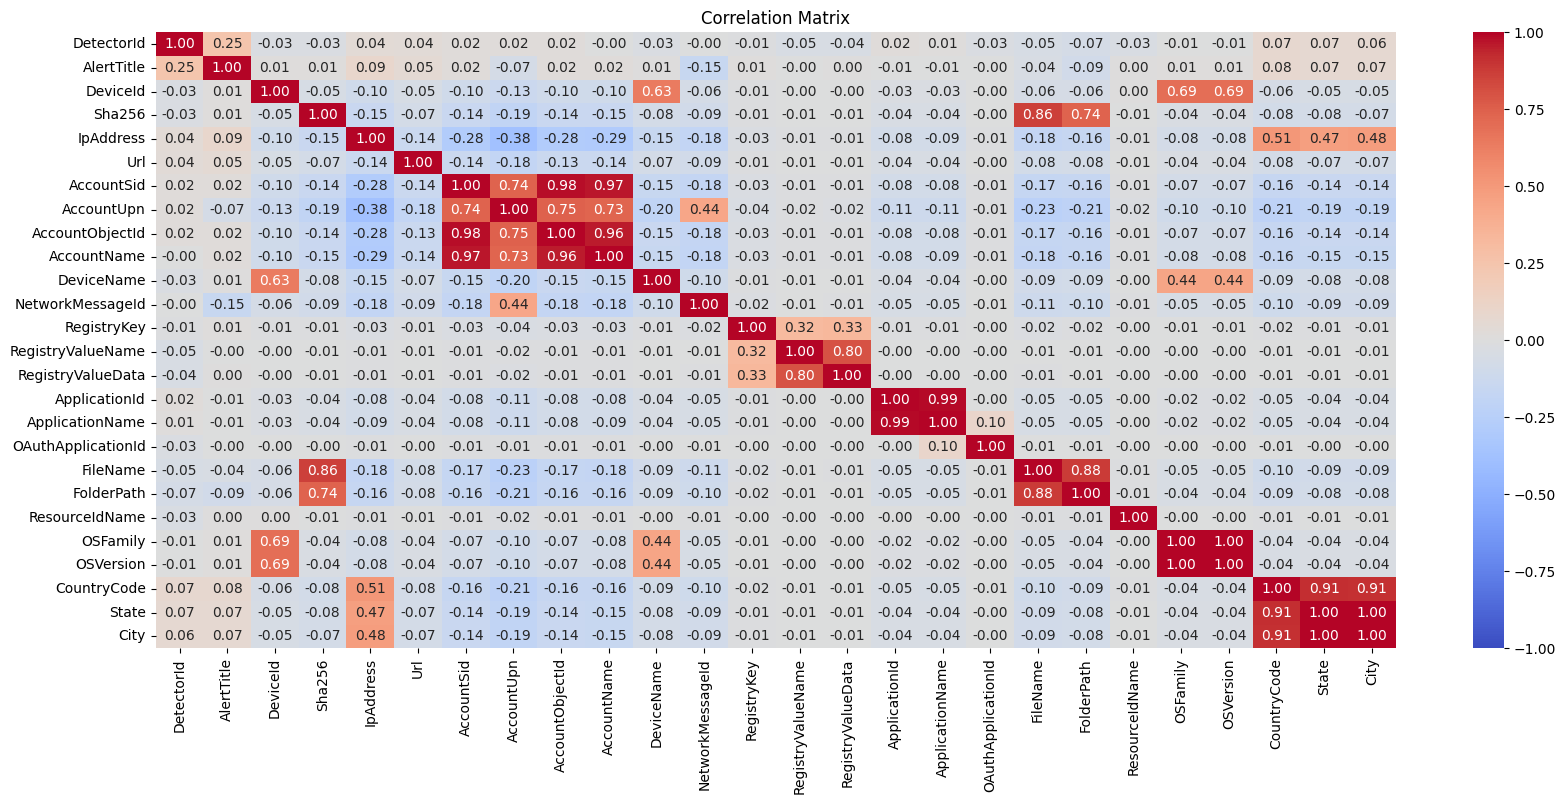

Highly Correlated Pairs:


OSFamily           OSVersion            0.999257
State              City                 0.995713
ApplicationId      ApplicationName      0.987270
AccountObjectId    AccountSid           0.983536
AccountSid         AccountName          0.966836
AccountObjectId    AccountName          0.958557
State              CountryCode          0.914400
City               CountryCode          0.910737
FolderPath         FileName             0.876606
FileName           Sha256               0.859692
RegistryValueName  RegistryValueData    0.802317
AccountUpn         AccountObjectId      0.749224
AccountSid         AccountUpn           0.739470
FolderPath         Sha256               0.739084
AccountName        AccountUpn           0.729920
OSVersion          DeviceId             0.688451
OSFamily           DeviceId             0.687887
DeviceName         DeviceId             0.633694
CountryCode        IpAddress            0.508536
dtype: float64

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named `df`

# Step 1: Select numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Step 4: (Optional) Extract highly correlated pairs
# Set a threshold for high correlation
threshold = 0.5
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[(high_corr_pairs > threshold) & (high_corr_pairs < 1)]

print("Highly Correlated Pairs:")
high_corr_pairs


In [57]:
high_corr_pairs.to_dict()

{('OSFamily', 'OSVersion'): 0.9992573558190554,
 ('State', 'City'): 0.9957133897335095,
 ('ApplicationId', 'ApplicationName'): 0.9872703900404257,
 ('AccountObjectId', 'AccountSid'): 0.9835357727847196,
 ('AccountSid', 'AccountName'): 0.9668360638300214,
 ('AccountObjectId', 'AccountName'): 0.9585572616168928,
 ('State', 'CountryCode'): 0.9143999157774338,
 ('City', 'CountryCode'): 0.9107370101303189,
 ('FolderPath', 'FileName'): 0.8766062794472351,
 ('FileName', 'Sha256'): 0.8596924759974053,
 ('RegistryValueName', 'RegistryValueData'): 0.8023167631954864,
 ('AccountUpn', 'AccountObjectId'): 0.749223520296034,
 ('AccountSid', 'AccountUpn'): 0.7394698864420004,
 ('FolderPath', 'Sha256'): 0.7390836035136142,
 ('AccountName', 'AccountUpn'): 0.7299201365312514,
 ('OSVersion', 'DeviceId'): 0.6884514184558315,
 ('OSFamily', 'DeviceId'): 0.6878866175198937,
 ('DeviceName', 'DeviceId'): 0.6336943833142851,
 ('CountryCode', 'IpAddress'): 0.5085361953463312}

In [58]:
# 1. Drop `OSFamily` (Keep `OSVersion`)
df.drop(columns=['OSFamily'], inplace = True)

# 2. Drop `City` (Keep `State`)
df.drop(columns=['City'], inplace = True)

# 3. Drop `ApplicationId` (Keep `ApplicationName`)
df.drop(columns=['ApplicationId'], inplace = True)

# 4. Drop `AccountObjectId` (Keep `AccountSid`)
df.drop(columns=['AccountObjectId'], inplace = True)

# 5. Keep both `AccountName` and `AccountSid`

# 6. Drop `CountryCode` (Keep `State`)
df.drop(columns=['CountryCode'], inplace = True)

# Convert FolderPath and FileName to string in case they are not
df['FolderPath'] = df['FolderPath'].astype(str)
df['FileName'] = df['FileName'].astype(str)

# Combine `FileName` and `FolderPath` into `FullFilePath`, then drop the original columns
df['FullFilePath'] = df['FolderPath'].str.rstrip('/') + '/' + df['FileName']
df = df.drop(columns=['FileName', 'FolderPath'])

# 8. Keep both `RegistryValueName` and `RegistryValueData`

# 9. Drop `FileName` (Keep `Sha256`)
# Note: Already handled in step 7 by combining with `FolderPath`

# 10. Keep both `DeviceId` and `DeviceName`

# 11. Drop `AccountObjectId` (Keep `AccountUpn`)
# Note: Already handled in step 4

# Display the updated DataFrame


In [59]:
df.shape

(5873178, 25)

In [60]:
import numpy as np

hour = pd.to_datetime(df['Timestamp']).dt.hour
df['Timestamp'] = np.where((0 <= hour) & (hour < 2), 0,
                    np.where((2 <= hour) & (hour < 4), 1,
                    np.where((4 <= hour) & (hour < 6), 2,
                    np.where((6 <= hour) & (hour < 8), 3,
                    np.where((8 <= hour) & (hour < 10), 4,
                    np.where((10 <= hour) & (hour < 12), 5,
                    np.where((12 <= hour) & (hour < 14), 6,
                    np.where((14 <= hour) & (hour < 16), 7,
                    np.where((16 <= hour) & (hour < 18), 8,
                    np.where((18 <= hour) & (hour < 20), 9,
                    np.where((20 <= hour) & (hour < 22), 10, 11)))))))))))

In [61]:
df.to_parquet("GUIDE_train_Feature_engineered_1.parquet", index = False)

In [62]:
import pandas as pd
df = pd.read_parquet("GUIDE_train_Feature_engineered_1.parquet")

In [63]:
# Remove restriction on maximum number of rows
pd.set_option('display.max_columns', None)

In [64]:
df

,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OAuthApplicationId,ResourceIdName,OSVersion,State,FullFilePath
0,7,126,7737,Ransomware,BenignPositive,File,Related,98799,111384,360606,160396,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,1445,87205/6
1,10,11,9,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,20223,20556,22659,153085,529644,1631,635,860,3421,881,3586,66,1445,117668/289573
2,7,17,106,Impact,BenignPositive,Ip,Related,98799,138268,10819,160396,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,1445,117668/289573
3,8,1329,2610,Collection,BenignPositive,User,Impacted,98799,138268,360606,160396,310348,338908,213398,153085,529644,1631,635,860,3421,881,3586,66,1445,117668/289573
4,5,54,33,Persistence,BenignPositive,User,Impacted,98799,138268,360606,160396,69754,113993,74513,153085,529644,1631,635,860,3421,881,3586,66,1445,117668/289573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873173,8,37,1645,Exfiltration,FalsePositive,File,Impacted,98799,138268,360606,160396,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,1445,0/1797
5873174,9,20,10779,Exfiltration,FalsePositive,File,Impacted,98799,22178,360606,160396,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,1445,18392/27060
5873175,1,57,29,CommandAndControl,FalsePositive,Url,Related,98799,138268,360606,113074,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,1445,117668/289573
5873176,8,19,15,InitialAccess,FalsePositive,Ip,Related,98799,138268,5902,160396,441377,673934,453297,153085,529644,1631,635,860,3421,881,3586,66,3,117668/289573


In [65]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

# One-Hot Encoding
one_hot_columns = ['Category', 'EntityType', 'EvidenceRole']
df = pd.get_dummies(df, columns=one_hot_columns)

# Label Encoding
label_enc = LabelEncoder()
df['IncidentGrade'] = label_enc.fit_transform(df['IncidentGrade'])
df['State'] = label_enc.fit_transform(df['State'])
df['FullFilePath_encoded'] = label_enc.fit_transform(df['FullFilePath'])
df.drop(columns=['FullFilePath'], inplace = True)

# Target Encoding
target_enc = ce.TargetEncoder(cols=['ApplicationName', 'DeviceName', 'AccountName'])
df = target_enc.fit_transform(df, df['IncidentGrade'])


c:\Users\Faster\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Faster\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Faster\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: Fu

In [67]:

# Verify the encoded data
print(df.head())

   Timestamp  DetectorId  AlertTitle  IncidentGrade  DeviceId  Sha256  \
0          7         126        7737              0     98799  111384   
1         10          11           9              0     98799  138268   
2          7          17         106              0     98799  138268   
3          8        1329        2610              0     98799  138268   
4          5          54          33              0     98799  138268   

   IpAddress     Url  AccountSid  AccountUpn  AccountName  DeviceName  \
0     360606  160396      441377      673934     0.978349      1.0249   
1     360606  160396       20223       20556     0.731059      1.0249   
2      10819  160396      441377      673934     0.978349      1.0249   
3     360606  160396      310348      338908     0.858149      1.0249   
4     360606  160396       69754      113993     0.832018      1.0249   

   NetworkMessageId  RegistryKey  RegistryValueName  RegistryValueData  \
0            529644         1631                

In [68]:
df.shape

(5873178, 77)

In [69]:
df.to_parquet("GUIDE_train_Feature_engineered_2.parquet", index = False)